In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


df=pd.read_csv('car_data.csv')
df.head()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df.shape

(4340, 8)

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['fuel', 'seller_type', 'transmission','owner']:
    df[col] = le.fit_transform(df[col])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [ ]:
from datetime import datetime
current_year = datetime.now().year
df['Car_Age'] = current_year - df['year']
df=df.drop('year', axis=1)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age
0,Maruti 800 AC,60000,70000,4,1,1,0,18
1,Maruti Wagon R LXI Minor,135000,50000,4,1,1,0,18
2,Hyundai Verna 1.6 SX,600000,100000,1,1,1,0,13
3,Datsun RediGO T Option,250000,46000,4,1,1,0,8
4,Honda Amaze VX i-DTEC,450000,141000,1,1,1,2,11


In [ ]:
df['km_driven'] = np.log1p(df['km_driven'])
df.head()


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age
0,Maruti 800 AC,60000,11.156265,4,1,1,0,18
1,Maruti Wagon R LXI Minor,135000,10.819798,4,1,1,0,18
2,Hyundai Verna 1.6 SX,600000,11.512935,1,1,1,0,13
3,Datsun RediGO T Option,250000,10.736418,4,1,1,0,8
4,Honda Amaze VX i-DTEC,450000,11.856522,1,1,1,2,11


In [ ]:
df['brand'] = df['name'].str.split().str[0]
df['model'] = df['name'].str.split().str[1]

# Then drop the 'name' column
df.drop('name', axis=1, inplace=True)

print(df.columns.tolist())

['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'Car_Age', 'brand', 'model']


In [ ]:
df.head(3)

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age,brand,model
0,60000,11.156265,4,1,1,0,18,Maruti,800
1,135000,10.819798,4,1,1,0,18,Maruti,Wagon
2,600000,11.512935,1,1,1,0,13,Hyundai,Verna


In [ ]:
df['owner'].unique()

array([0, 2, 1, 4, 3])

In [ ]:
df = pd.get_dummies(df, columns=['brand','model'], drop_first=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age,brand_Audi,brand_BMW,brand_Chevrolet,...,model_Xcent,model_Xenon,model_Xylo,model_Yaris,model_Yeti,model_Zen,model_Zest,model_i10,model_i20,model_redi-GO
0,60000,11.156265,4,1,1,0,18,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,135000,10.819798,4,1,1,0,18,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,600000,11.512935,1,1,1,0,13,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,250000,10.736418,4,1,1,0,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,450000,11.856522,1,1,1,2,11,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42))
]

# Stacking regressor
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

stack_model.fit(X_train, y_train)


StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=Ridge())

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = stack_model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.7430665484238363
MAE: 103704.57134993846
RMSE: 280015.09766830405


In [ ]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age,brand_Audi,brand_BMW,brand_Chevrolet,...,model_Xcent,model_Xenon,model_Xylo,model_Yaris,model_Yeti,model_Zen,model_Zest,model_i10,model_i20,model_redi-GO
0,60000,11.156265,4,1,1,0,18,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,135000,10.819798,4,1,1,0,18,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,600000,11.512935,1,1,1,0,13,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,250000,10.736418,4,1,1,0,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,450000,11.856522,1,1,1,2,11,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'Car_Age', 'brand_Audi', 'brand_BMW', 'brand_Chevrolet',
       ...
       'model_Xcent', 'model_Xenon', 'model_Xylo', 'model_Yaris', 'model_Yeti',
       'model_Zen', 'model_Zest', 'model_i10', 'model_i20', 'model_redi-GO'],
      dtype='object', length=219)


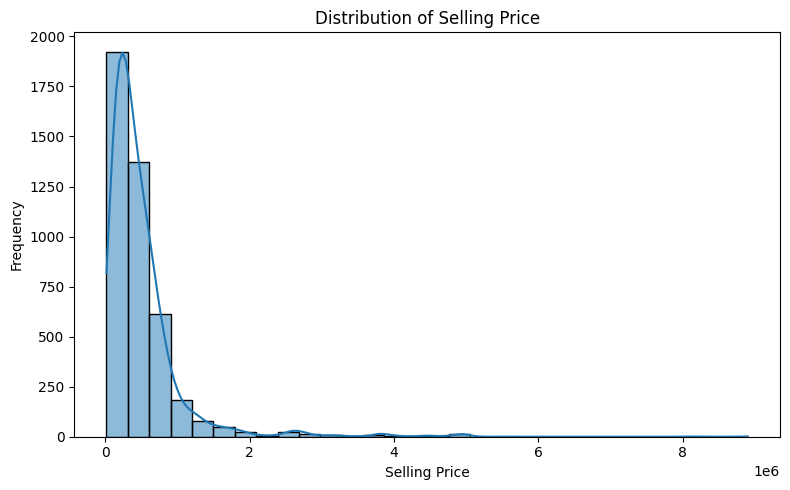

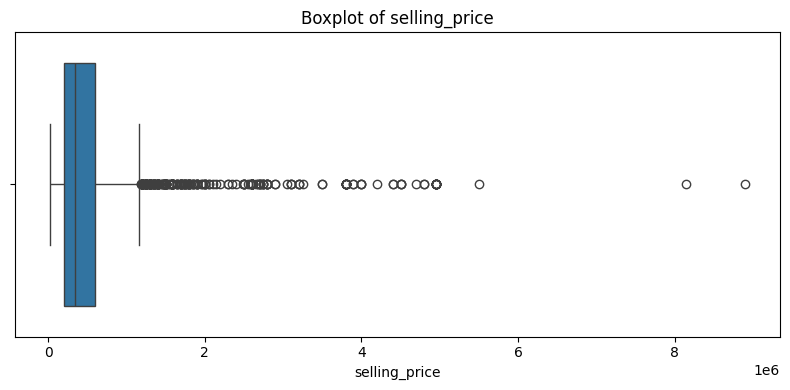

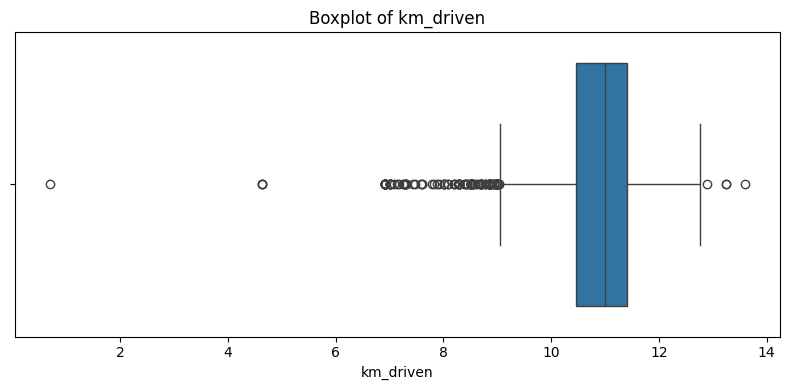

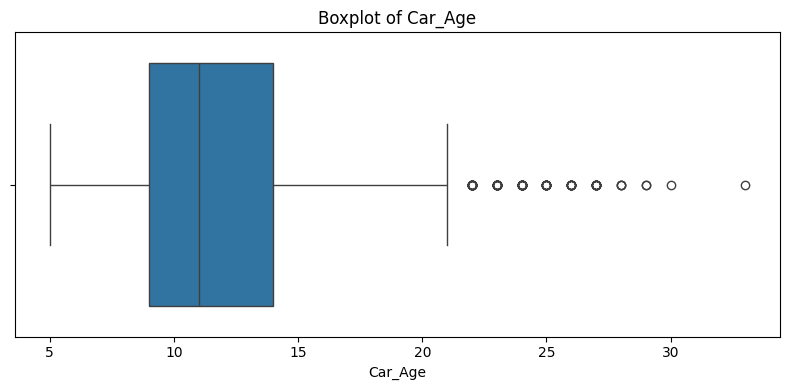

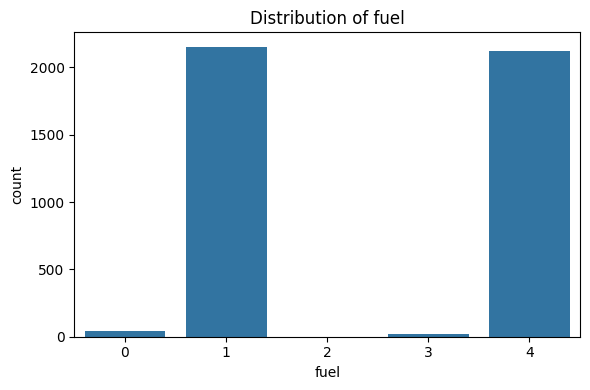

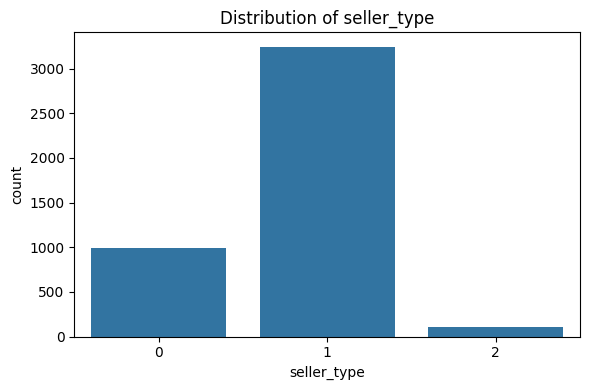

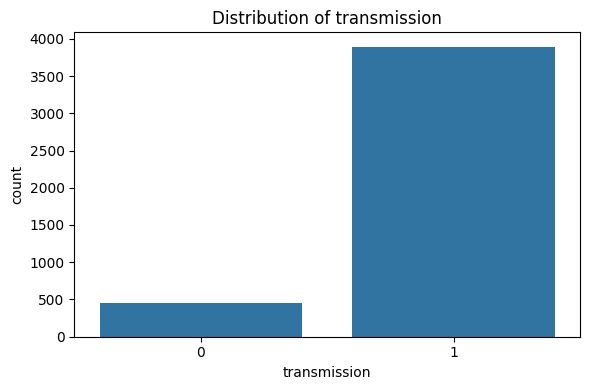

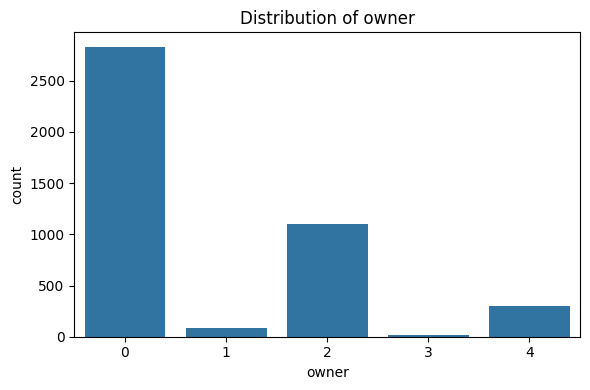

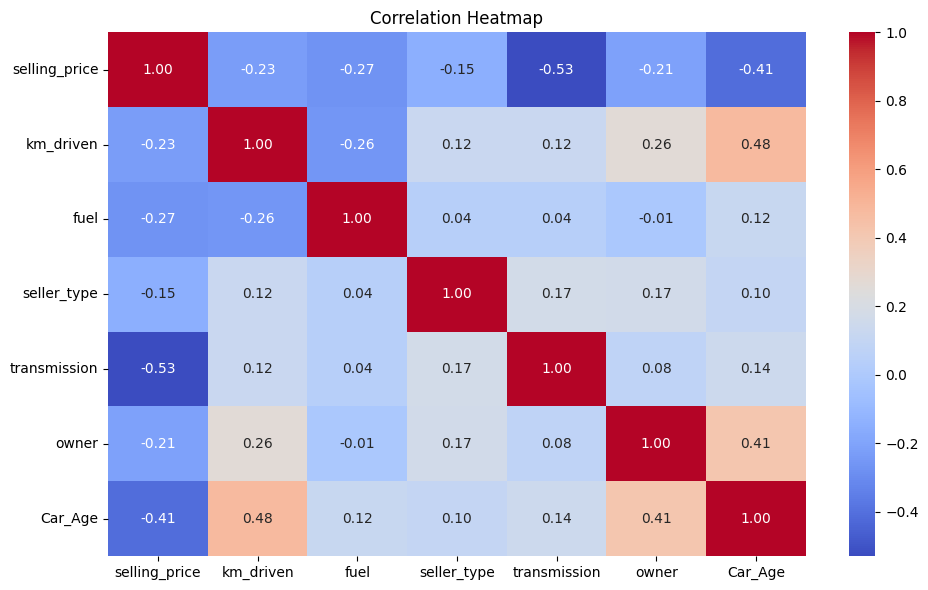

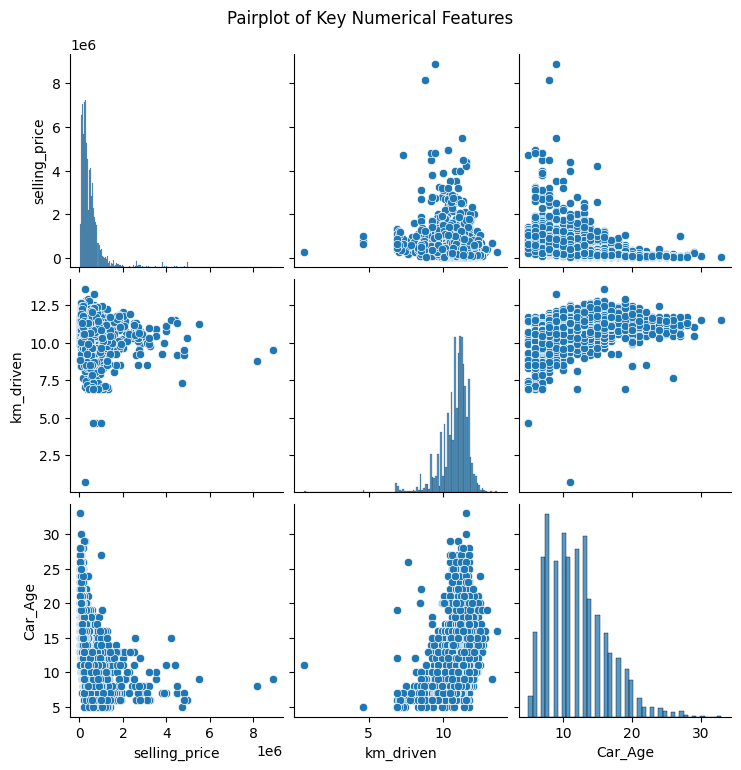

In [ ]:
import pandas as pd

print(df.columns)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Distribution of Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 2: Boxplot to detect outliers in numerical features
num_cols = ['selling_price', 'km_driven', 'Car_Age']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Plot 3: Count plot for categorical features
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Plot 4: Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Plot 5: Pairplot of key numerical features
selected_cols = ['selling_price', 'km_driven', 'Car_Age']
sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()


In [ ]:
def get_lower_upper(data):
    Q1, Q3 = data.selling_price.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

In [ ]:
lower, upper = get_lower_upper(df)
lower, upper

(-378125.625, 1186875.375)

In [ ]:
df[(df.selling_price<lower)|(df.selling_price >upper)]

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age,brand_Audi,brand_BMW,brand_Chevrolet,...,model_Xcent,model_Xenon,model_Xylo,model_Yaris,model_Yeti,model_Zen,model_Zest,model_i10,model_i20,model_redi-GO
12,1650000,10.126671,4,0,0,0,7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,1650000,10.126671,4,0,0,0,7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27,1195000,8.517393,1,0,1,0,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,1964999,10.239996,1,0,0,0,11,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,1425000,10.985310,1,0,0,0,12,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,2500000,11.156265,4,1,0,2,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4228,1225000,11.156265,1,1,1,0,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4304,3899000,9.998843,1,0,0,0,7,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4311,1900000,9.909420,4,0,0,0,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_new = df[(df.selling_price>lower)&(df.selling_price <upper)]
df_new

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age,brand_Audi,brand_BMW,brand_Chevrolet,...,model_Xcent,model_Xenon,model_Xylo,model_Yaris,model_Yeti,model_Zen,model_Zest,model_i10,model_i20,model_redi-GO
0,60000,11.156265,4,1,1,0,18,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,135000,10.819798,4,1,1,0,18,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,600000,11.512935,1,1,1,0,13,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,250000,10.736418,4,1,1,0,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,450000,11.856522,1,1,1,2,11,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,11.289794,1,1,1,2,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4336,409999,11.289794,1,1,1,2,11,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4337,110000,11.326608,4,1,1,2,16,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4338,865000,11.407576,1,1,1,0,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_new[(df_new.selling_price<lower)|(df_new.selling_price >upper)]

,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age,brand_Audi,brand_BMW,brand_Chevrolet,...,model_Xcent,model_Xenon,model_Xylo,model_Yaris,model_Yeti,model_Zen,model_Zest,model_i10,model_i20,model_redi-GO


In [ ]:
X = df_new.drop('selling_price', axis=1)
y = df_new['selling_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42))
]

# Stacking regressor
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)

stack_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=Ridge())

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = stack_model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8340983719275731
MAE: 65767.5250038845
RMSE: 98040.52214391419


In [ ]:
import pickle
with open("final_model.pkl", "wb") as f:
    pickle.dump(stack_model, f)

NameError: name 'stack_model' is not defined

In [ ]:
from IPython.display import FileLink

# Display clickable download link
FileLink("final_model.pkl")


e:\My Programs\Car_Price_Prediction\final_model.pkl